In [1]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [2]:
SAMPLE_PATH = 'streamlit_data/'
n = 10_000
seed = 42
how = 'heuristics_simple'

files_annotated = pd.read_json(SAMPLE_PATH + f'files_{seed}_{n}_{how}_annotated.json')

In [3]:
N = 500
files_annotated.iloc[:N].labels

2802113                        {'Culture': 0}
2195257                        {'Society': 1}
2776225                         {'Nature': 1}
1649904          {'People': 1, 'Politics': 1}
2291097                        {'Society': 0}
                          ...                
389771            {'Society': 1, 'Places': 1}
3081204    {'Culture': 0, 'Entertainment': 1}
1569462                                    {}
3531398                         {'Places': 1}
756186                          {'Nature': 1}
Name: labels, Length: 500, dtype: object

In [4]:
labels = ['Nature', 'Animals', 'Fossils', 'Landscapes', 'Marine organisms', 'Plants', 'Weather', 
          'Society', 'Culture', 'Art', 'Belief', 'Entertainment', 'Events', 'Flags', 'Food', 'History', 
          'Language', 'Literature', 'Music', 'Objects', 'People', 'Places', 'Politics', 'Sports',
          'Science', 'Astronomy', 'Biology', 'Chemistry', 'Earth sciences', 'Mathematics',
          'Medicine', 'Physics', 'Technology', 'Engineering', 'Architecture', 'Chemical eng', 'Civil eng', 'Electrical eng',
          'Environmental eng', 'Geophysical eng', 'Mechanical eng', 'Process eng']

In [5]:
counters = defaultdict(list)

for row in files_annotated.iloc[:N].labels.values:
    for k, v in row.items():
        counters[k] += [v]


evaluations = pd.Series({'Nature': ['Nature', 'Animals', 'Fossils', 'Landscapes', 'Marine organisms', 'Plants', 'Weather'],
                    'Society/Culture': ['Society', 'Culture', 'Art', 'Belief', 'Entertainment', 'Events', 'Flags', 'Food', 'History', 
                    'Language', 'Literature', 'Music', 'Objects', 'People', 'Places', 'Politics', 'Sports'],
                    'Science': ['Science', 'Astronomy', 'Biology', 'Chemistry', 'Earth sciences', 'Mathematics',
                    'Medicine', 'Physics', 'Technology'],
                    'Engineering': ['Engineering', 'Architecture', 'Chemical eng', 'Civil eng', 'Electrical eng',
                      'Environmental eng', 'Geophysical eng', 'Mechanical eng', 'Process eng']})
evaluations = evaluations.reset_index().explode(column=0).reset_index().rename({'level_0': 'order', 'index': 'Group', 0: 'name'}, axis=1)
evaluations = evaluations.set_index('name')
evaluations.loc[counters.keys(), 'raw'] = list(counters.values())

# evaluations = pd.DataFrame({'raw': evaluations}, index=labels)
evaluations['raw'] = evaluations.apply(lambda r: r.raw if type(r.raw) is list else [], axis=1)
evaluations['count'] = evaluations.apply(lambda r: len(r.raw), axis=1)
evaluations['correct'] = evaluations.apply(lambda r: sum(r.raw), axis=1)
evaluations['wrong'] = evaluations['count'] - evaluations['correct']
evaluations = pd.concat([evaluations.sum(axis=0).rename('Total').to_frame().T, evaluations])
evaluations['accuracy'] = evaluations.raw.apply(lambda x: np.average(x))
evaluations['std'] = evaluations.raw.apply(lambda x: np.std(x))
evaluations['std_mean'] = evaluations['std'] / evaluations['count'].pow(0.5).replace(0, None)
evaluations.loc['Total', 'Group'] = 'Total'
evaluations.loc['Total', 'order'] = -1

evaluations

/home/salvi/.conda/envs/taxonomy/lib/python3.10/site-packages/pandas/core/dtypes/missing.py:550: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.array(val, copy=False)
/home/salvi/.conda/envs/taxonomy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/home/salvi/.conda/envs/taxonomy/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:883: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or 

,order,Group,raw,count,correct,wrong,accuracy,std,std_mean
Total,-1,Total,"[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, ...",774,483,291,0.624031,0.484372,0.01741
Nature,0,Nature,"[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, ...",57,31,26,0.543860,0.498073,0.065971
Animals,0,Nature,"[1, 1, 0]",3,2,1,0.666667,0.471405,0.272166
Fossils,0,Nature,[],0,0,0,NaN,NaN,NaN
Landscapes,0,Nature,"[1, 1]",2,2,0,1.000000,0.000000,0.0
Marine organisms,0,Nature,[],0,0,0,NaN,NaN,NaN
Plants,0,Nature,"[1, 1, 1, 1, 1, 1]",6,6,0,1.000000,0.000000,0.0
Weather,0,Nature,[],0,0,0,NaN,NaN,NaN
Society,1,Society/Culture,"[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...",129,85,44,0.658915,0.474074,0.04174
Culture,1,Society/Culture,"[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, ...",85,48,37,0.564706,0.495795,0.053777


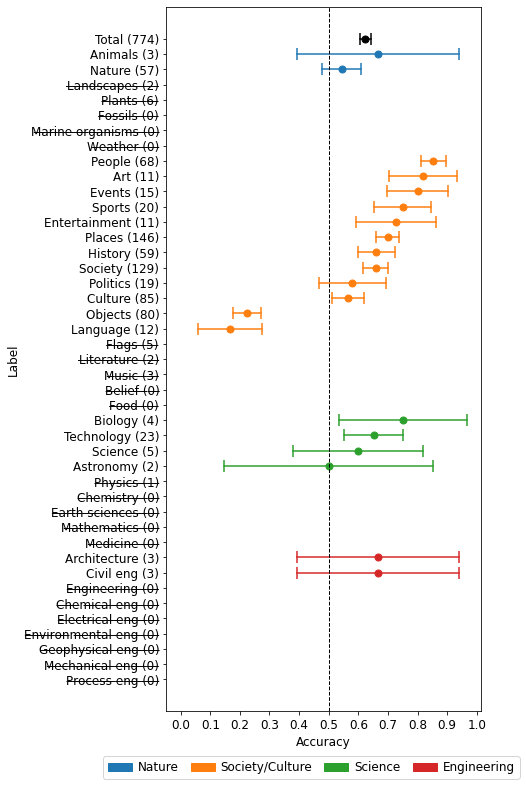

In [11]:
# plt.style.use('ggplot')
evaluations['accuracy'] = evaluations.correct.astype(bool) * evaluations.wrong.astype(bool) * evaluations.accuracy
evaluations = evaluations.sort_values(['order', 'accuracy'], ascending=[True, False])

plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(7, 11))
color_dict = {-1: 'black', 0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728'}

for index, row in evaluations[::-1].iterrows():
    x = row.accuracy
    err = row.std_mean
    label = index + f' ({row["count"]})'
    color = color_dict[row.order]
    if err == 0 or np.isnan(err):
        err = 0
        x = 0
        label = '\u0336'.join(label) + '\u0336'
        color = 'white'
        pass

    plt.plot(x, label, 'o', markersize = 7, color=color)
    plt.plot((x-err, x+err), (label, label), "-|", markersize = 12, markeredgewidth= 1.5, linewidth = 1.5, color=color)
plt.axvline(0.5, ls='--', linewidth=1, color='black')
plt.legend(handles=[mpatches.Patch(color='#1f77b4', label='Nature'),
                    mpatches.Patch(color='#ff7f0e', label='Society/Culture'),
                    mpatches.Patch(color='#2ca02c', label='Science'),
                    mpatches.Patch(color='#d62728', label='Engineering')],
            loc='upper left', prop={'size': 12}, bbox_to_anchor=(-0.22, -0.055), ncol=4, handletextpad=0.5, columnspacing=1)

plt.xlabel('Accuracy')
plt.ylabel('Label')
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.tight_layout()
plt.savefig('plots/evaluation.pdf')
# plt.show()

In [15]:
files_annotated.labels

2802113                                       {'Culture': 0}
2195257                                       {'Society': 1}
2776225                                        {'Nature': 1}
1649904                         {'People': 1, 'Politics': 1}
2291097                                       {'Society': 0}
                                 ...                        
184364                     {'People': None, 'Society': None}
3385898                                                   {}
2424584                                    {'Society': None}
3213571                                     {'Places': None}
2332497    {'Culture': None, 'History': None, 'Nature': N...
Name: labels, Length: 10000, dtype: object

In [25]:
np.all(list({}.values()))

True

In [26]:
file_values = files_annotated.labels.iloc[:N].apply(lambda x: list(x.values()))
nzero_files = file_values[file_values.apply(lambda x: len(x) > 0)]

In [38]:
nzero_files.apply(lambda x: np.all(x)).value_counts(normalize=True)

False    0.526829
True     0.473171
Name: labels, dtype: float64

In [39]:
nzero_files.apply(lambda x: np.any(x)).value_counts(normalize=True)

True     0.829268
False    0.170732
Name: labels, dtype: float64